In [2]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785741,22003.000000,10662.000000
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:48,90000.000000,27.500000
50%,2023-06-29 06:11:38,115000.000000,45.980000
75%,2023-09-27 01:01:16,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [4]:
df['salary_year_avg'].min()

15000.0

In [5]:
min_salary = df['salary_year_avg'].idxmin()

In [6]:
df.iloc[min_salary]

job_title_short                                              Data Engineer
job_title                                           Data Engineer - Hadoop
job_location                                                        Brazil
job_via                                                       via LinkedIn
job_schedule_type                                                Full-time
job_work_from_home                                                   False
search_location                                                     Brazil
job_posted_date                                        2023-12-09 10:05:30
job_no_degree_mention                                                 True
job_health_insurance                                                 False
job_country                                                         Brazil
salary_rate                                                           year
salary_year_avg                                                    15000.0
salary_hour_avg          

In [7]:
df['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [8]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [9]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [10]:
df.groupby('job_title_short')[['salary_year_avg', 'salary_hour_avg']].median()

,salary_year_avg,salary_hour_avg
job_title_short,,
Business Analyst,85000.0,40.362499
Cloud Engineer,90000.0,40.000000
Data Analyst,90000.0,32.615002
Data Engineer,125000.0,58.500000
Data Scientist,127500.0,47.500000
Machine Learning Engineer,106415.0,47.535000
Senior Data Analyst,111175.0,47.500000
Senior Data Engineer,147500.0,61.500000
Senior Data Scientist,155500.0,47.620003


In [11]:
df.groupby('job_title_short')['salary_year_avg'].agg(['min', 'max', 'median', 'mean'])

,min,max,median,mean
job_title_short,,,,
Business Analyst,16500.0,387460.0,85000.0,91082.612833
Cloud Engineer,42000.0,280000.0,90000.0,111268.453846
Data Analyst,25000.0,650000.0,90000.0,93841.907854
Data Engineer,15000.0,525000.0,125000.0,130125.604250
Data Scientist,27000.0,960000.0,127500.0,135988.837171
Machine Learning Engineer,30000.0,325000.0,106415.0,126774.315972
Senior Data Analyst,30000.0,425000.0,111175.0,113911.363665
Senior Data Engineer,35000.0,425000.0,147500.0,145840.611624
Senior Data Scientist,45000.0,890000.0,155500.0,154206.292996


In [12]:
df['job_location'].value_counts().head(10)

job_location
Anywhere                       69552
Singapore                      23415
Paris, France                  12311
Bengaluru, Karnataka, India    11474
London, UK                     10564
Madrid, Spain                   9787
New York, NY                    8165
India                           7660
United States                   7454
Hong Kong                       7341
Name: count, dtype: int64

In [13]:
df['job_location'].isin(['North Korea']).any()

np.False_

In [14]:
us_job = df[df['job_country'] == 'United States']

In [15]:
us_job = us_job[us_job['salary_year_avg'].notna()]

In [16]:
us_job.groupby('job_title_short')['salary_year_avg'].agg(['min', 'max', 'median', 'mean']).sort_values(by='median', ascending=True)

,min,max,median,mean
job_title_short,,,,
Business Analyst,35000.0,387460.0,90000.0,96175.447397
Data Analyst,25000.0,375000.0,90000.0,94553.964924
Senior Data Analyst,35360.0,425000.0,110000.0,115729.129954
Cloud Engineer,42000.0,221844.0,116100.0,120090.900000
Data Engineer,23496.0,525000.0,125000.0,134226.676753
Data Scientist,30000.0,960000.0,130000.0,139946.707204
Software Engineer,48982.0,375000.0,130000.0,137964.929588
Machine Learning Engineer,44408.5,315000.0,150000.0,154240.382812
Senior Data Engineer,45000.0,375000.0,150000.0,151448.023186


In [17]:
from matplotlib import pyplot as plt
import numpy as np


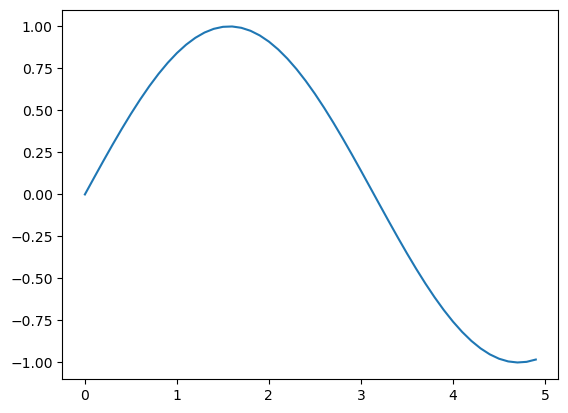

In [18]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)


In [19]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

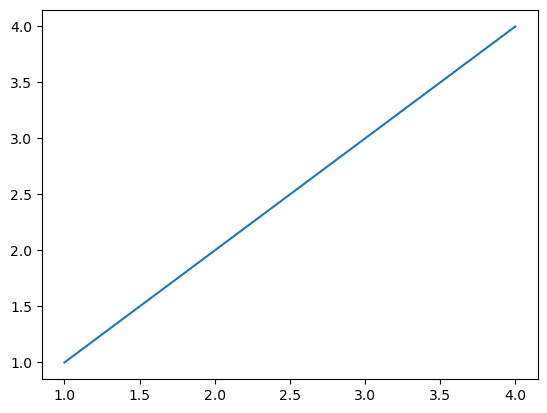

In [20]:
plt.plot(x, y)
plt.show()

In [21]:
date_counts = df.job_posted_date.value_counts()
date_counts = date_counts.sort_index()

In [22]:
type(date_counts)

pandas.core.series.Series

In [23]:
date_counts

job_posted_date
2023-01-01 00:00:04    1
2023-01-01 00:00:07    1
2023-01-01 00:00:22    1
2023-01-01 00:00:24    1
2023-01-01 00:00:27    1
                      ..
2023-12-31 23:40:18    2
2023-12-31 23:40:22    2
2023-12-31 23:40:31    2
2023-12-31 23:40:32    1
2023-12-31 23:59:58    2
Name: count, Length: 607192, dtype: int64

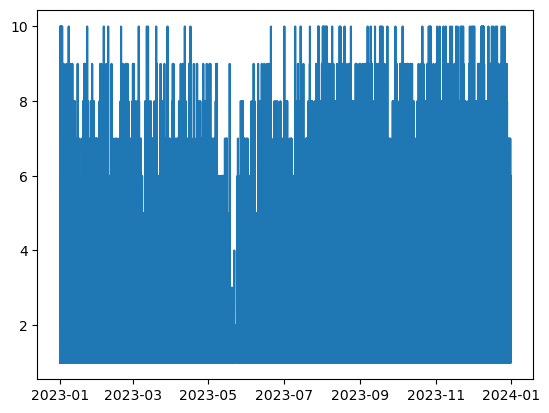

In [24]:
plt.plot(date_counts.index, date_counts)

In [25]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [26]:
month_count = df.job_posted_month.value_counts()
month_count = month_count.sort_index()


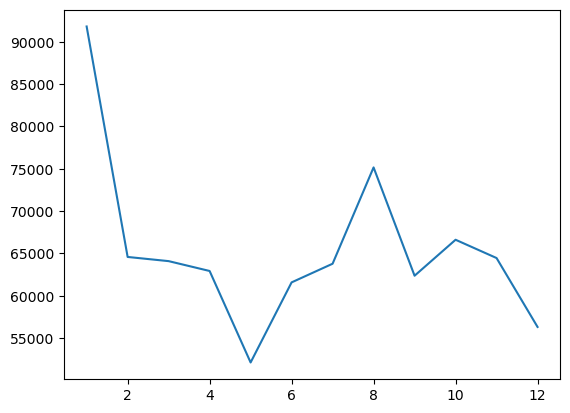

In [27]:
plt.plot(month_count.index, month_count.values)
plt.show()

In [28]:
job_count = df.job_title_short.value_counts()



In [29]:
job_count

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

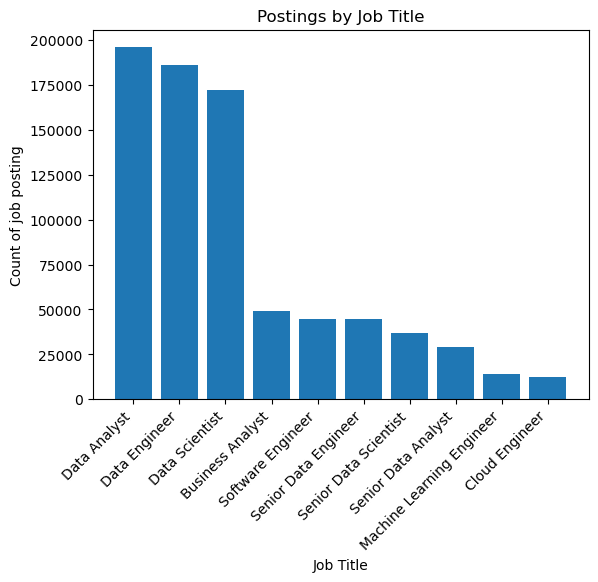

In [30]:
plt.bar(job_count.index, job_count.values)
plt.title('Postings by Job Title')
plt.ylabel('Count of job posting')
plt.xlabel('Job Title')
plt.xticks(rotation=45, ha ='right')
plt.show()


<BarContainer object of 10 artists>

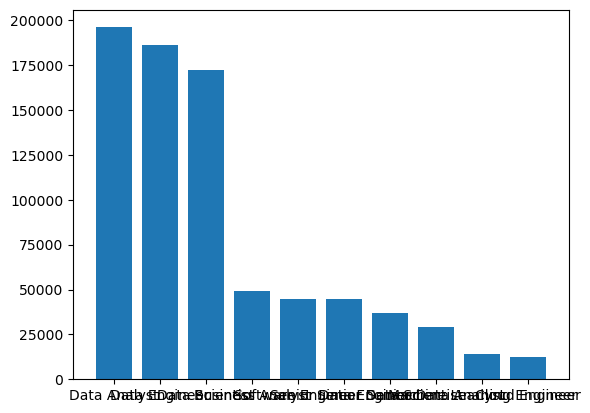

In [31]:
plt.bar(job_count.index, job_count.values)

<Axes: xlabel='job_title_short'>

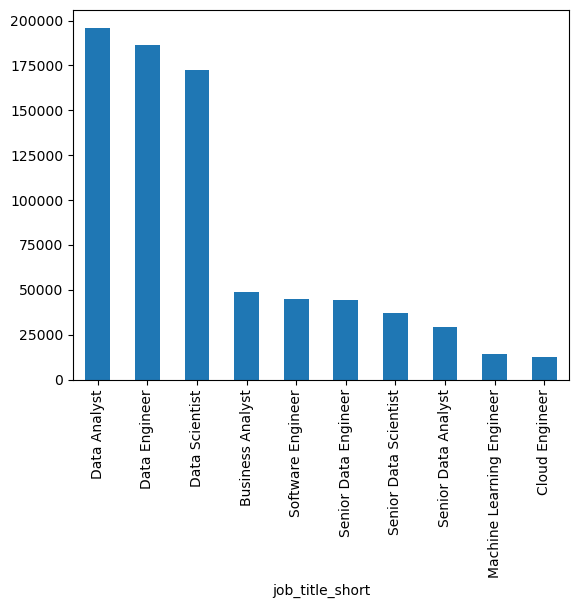

In [32]:
job_count.plot(kind='bar')

In [33]:
dataframe = df[['job_posted_month', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

In [34]:
dataFrame = dataframe.sort_values(['job_posted_month' , 'salary_year_avg'])


In [35]:
dataFrame

,job_posted_month,salary_year_avg
556386,1,32500.000000
770873,1,35000.000000
674338,1,37107.199219
326481,1,37500.000000
737524,1,39500.000000
...,...,...
472583,12,320000.000000
442148,12,325000.000000
317470,12,349500.000000
474325,12,450000.000000


<Axes: xlabel='job_posted_month'>

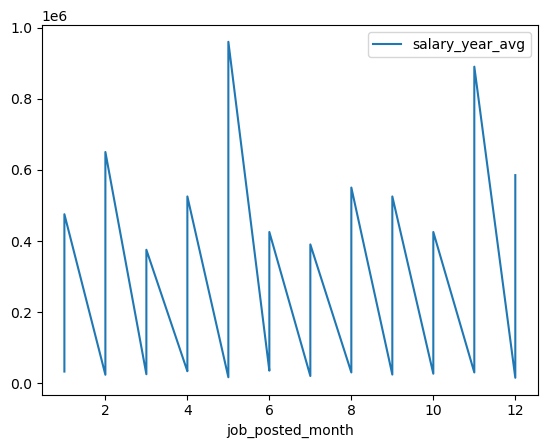

In [36]:
dataFrame.plot(x = 'job_posted_month', y = 'salary_year_avg', kind = 'line')

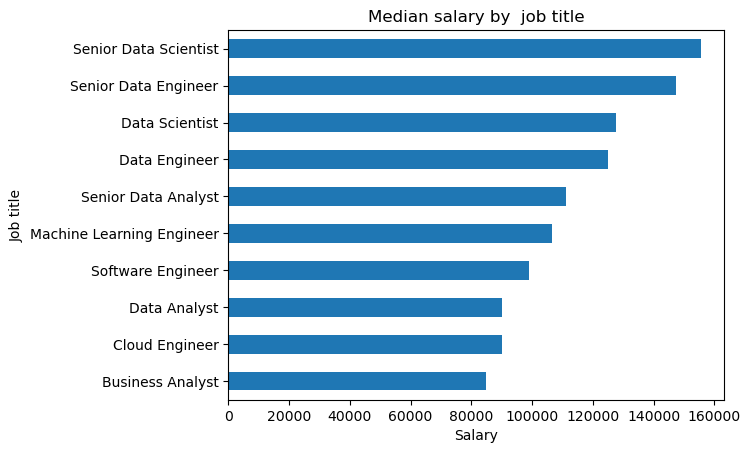

In [37]:
job_short = df.groupby('job_title_short')['salary_year_avg'].median().sort_values().plot(kind='barh')
plt.title('Median salary by  job title')
plt.xlabel('Salary')
plt.ylabel('Job title')
plt.show()
